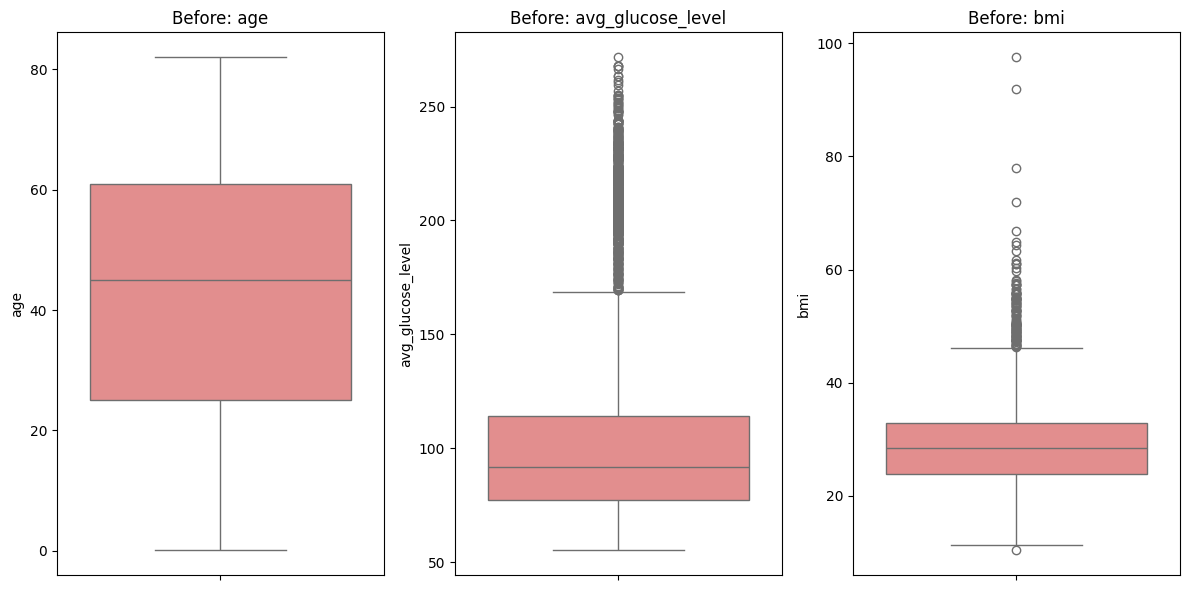

Original dataset shape: (5110, 12)
After removing outliers: (4383, 12)


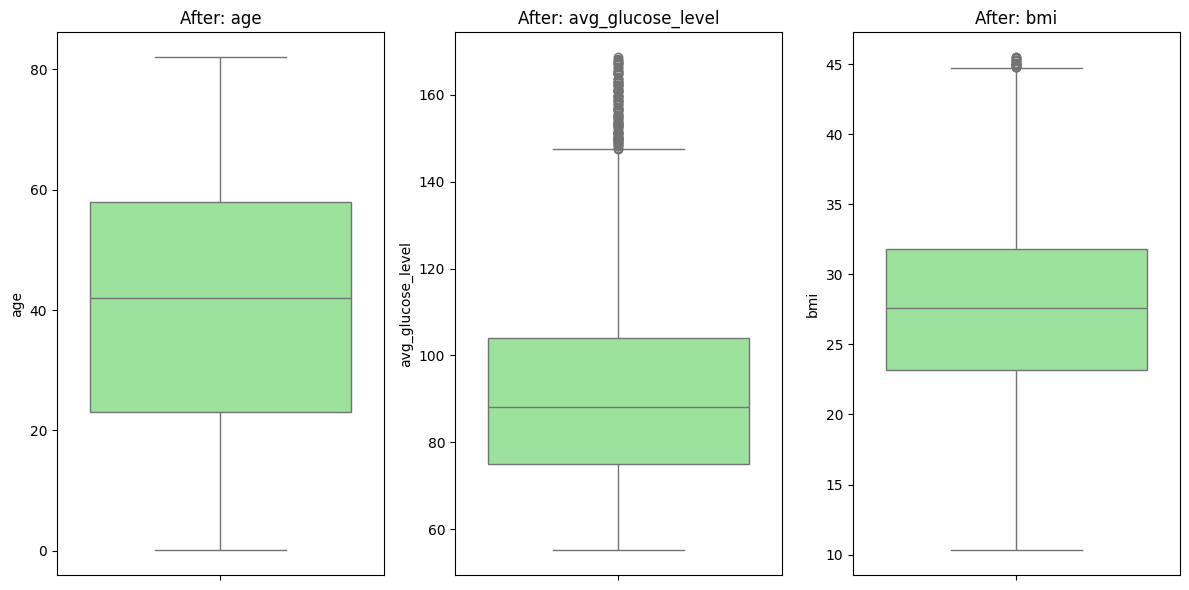

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("healthcare-stroke-data-cleaned.xlsx")

num_cols = ["age", "avg_glucose_level", "bmi"]

# Remove Outliers
def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for col in columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Keep only values within range
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower) & (cleaned_data[col] <= upper)]
    return cleaned_data

#Boxplots before removing outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Before: {col}")
plt.tight_layout()
plt.show()

# Remove outliers
print("Original dataset shape:", df.shape)
df_clean = remove_outliers_iqr(df, num_cols)
print("After removing outliers:", df_clean.shape)

# Boxplots after removing outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color="lightgreen")
    plt.title(f"After: {col}")
plt.tight_layout()
plt.show()


df_clean.to_excel("healthcare-stroke-data-no-outliers.xlsx", index=False)
